# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
DATASET_PATH = "./data/heart_disease/"

In [3]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [5]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
# Datos faltantes:
missing_values = my_data.isna().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [7]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

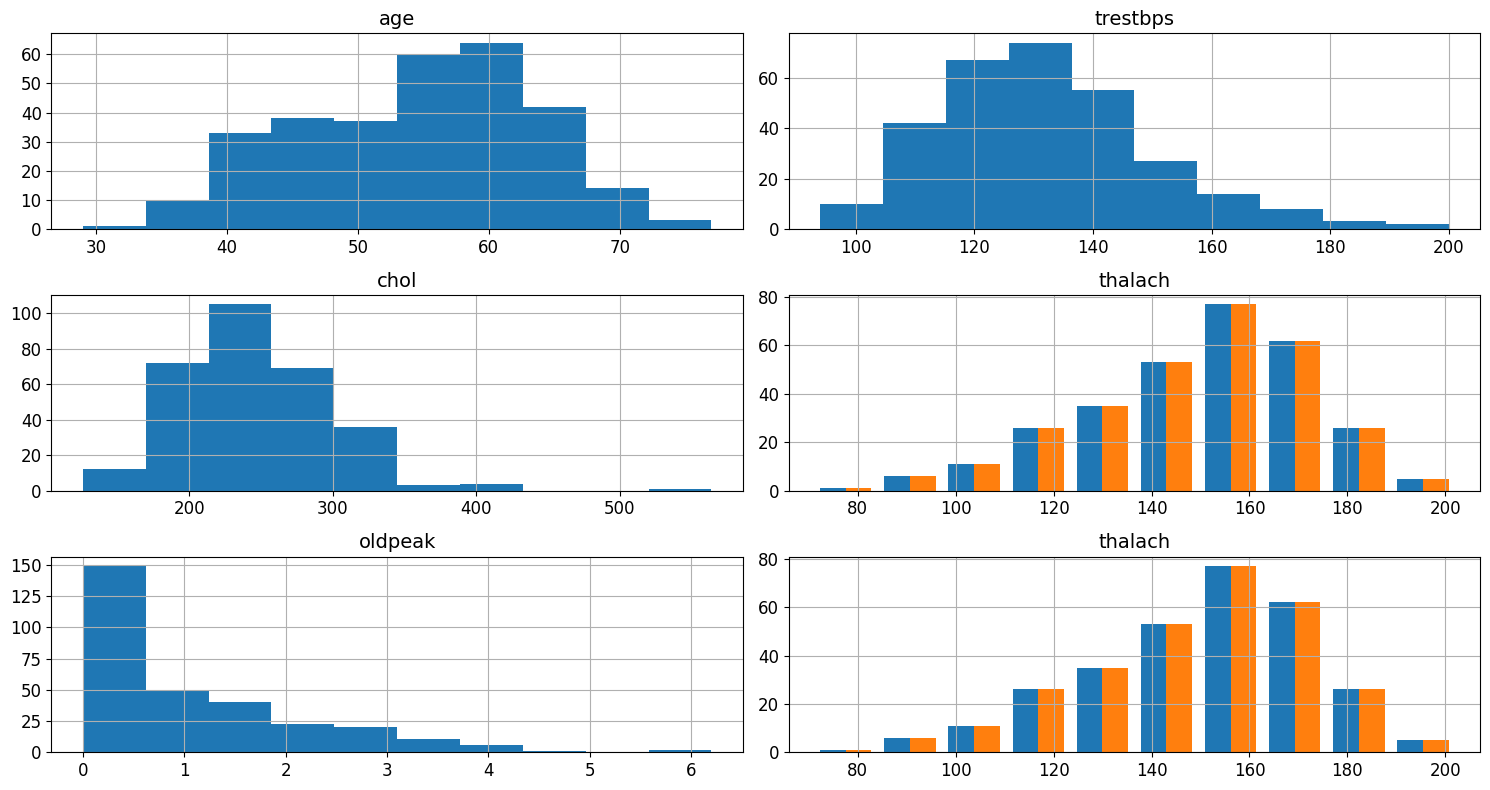

In [8]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(15,8),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
    
display_dataset_distributions(my_data[numerical_features])

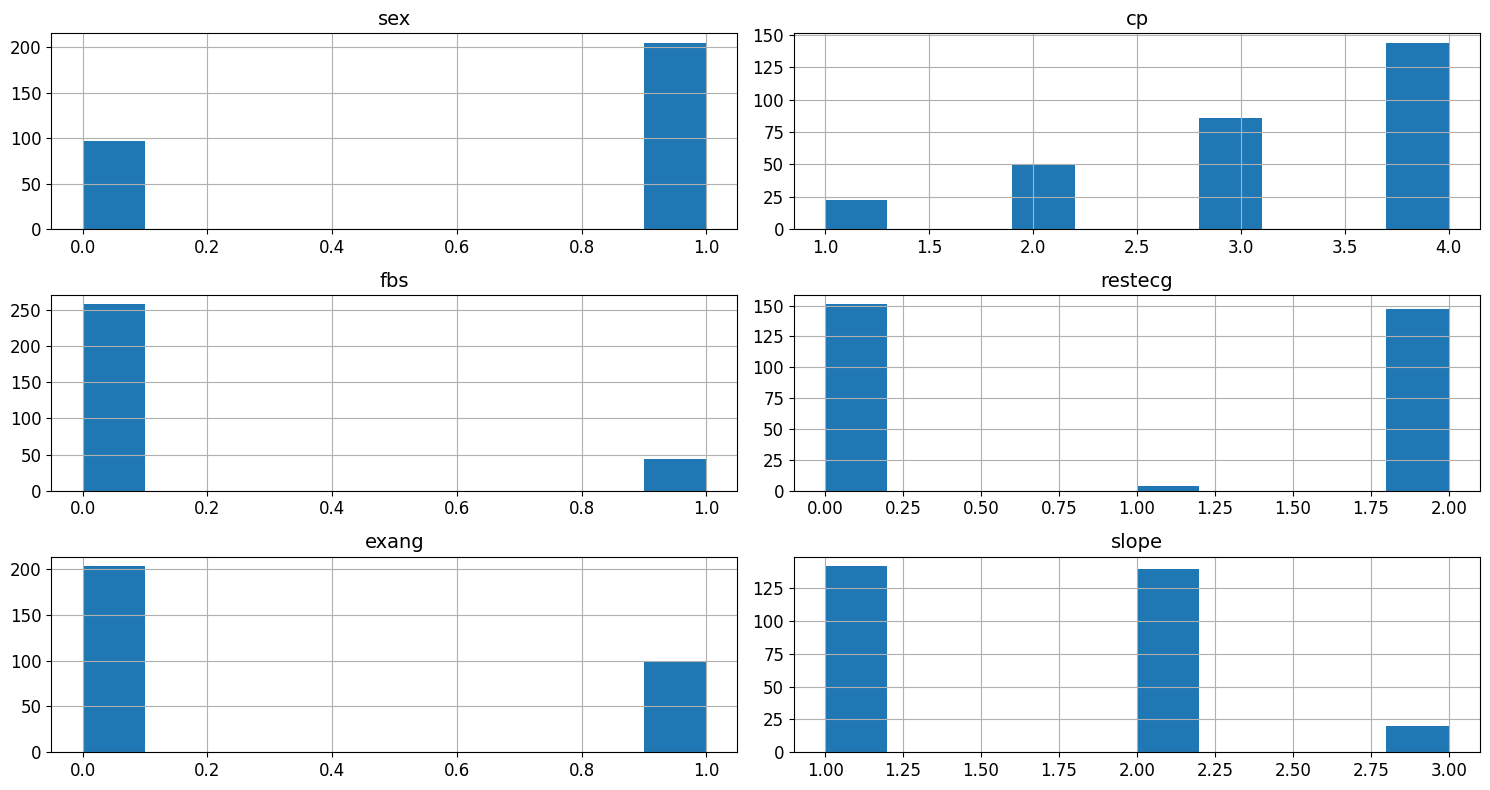

In [9]:
display_dataset_distributions(my_data[categorical_features])

# Preprocesamiento de datos

### Binarizar a la variable target

In [10]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

[1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1
 1 1 1 1 1 0]


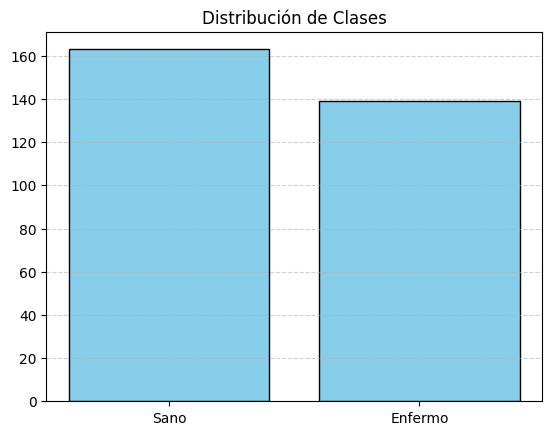

In [11]:
# Crear clases binarias
y = my_data[target].values

sano_mask = y == 0
enfermo_mask = y > 0

y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

print(y_class)

plt.hist(y_class, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.title('Distribución de Clases')
plt.xticks([0, 1], ['Sano', 'Enfermo'])
plt.show()

In [12]:
y_class_df = pd.DataFrame(y_class, columns=["target"])
my_data = pd.concat([my_data, y_class_df], axis=1)
my_data.drop(columns=["num"], inplace=True)
my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Eliminar filas con valores desconocidos ("?")

In [13]:
unkown_values = (my_data[categorical_features] == '?').sum()
print(unkown_values)

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
ca         4
thal       2
dtype: int64


### One hot encoding

In [14]:
# Valores que puede tomar cada columna categorica
unique_values = my_data[categorical_features].apply(lambda x: x.unique())
print(unique_values)

sex                     [1.0, 0.0]
cp            [4.0, 3.0, 2.0, 1.0]
fbs                     [0.0, 1.0]
restecg            [2.0, 0.0, 1.0]
exang                   [1.0, 0.0]
slope              [2.0, 3.0, 1.0]
ca         [3.0, 2.0, 0.0, 1.0, ?]
thal            [3.0, 7.0, 6.0, ?]
dtype: object


In [15]:
my_data_encoded = pd.get_dummies(my_data, columns=categorical_features, drop_first=True)
my_data_encoded.drop(numerical_features, axis=1).head()

,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,1,True,False,False,True,False,False,True,True,True,False,False,False,True,False,False,False,False
1,1,True,False,False,True,False,False,True,True,True,False,False,True,False,False,False,True,False
2,0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
my_data_encoded = pd.get_dummies(my_data[categorical_features])
my_data_encoded.head()

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False


In [17]:
rows_with_unknown_values = my_data[categorical_features].apply(lambda x: '?' in x.values, axis=1)
my_data_cleaned = my_data.loc[~rows_with_unknown_values]
num_rows_dropped = len(my_data) - len(my_data_cleaned)
print("Número de filas eliminadas:", len(my_data) - len(my_data_cleaned), " (",round(num_rows_dropped/len(my_data)*100,2),"%)")
my_data = my_data_cleaned


Número de filas eliminadas: 6  ( 1.99 %)


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

### Dividir en train, test y validation

In [19]:
p_test = .15
p_val = .10

X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    my_data.drop(['target'], axis=1),
    my_data['target'],
    test_size=p_test,
    shuffle=True,
    stratify=my_data['target']
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp,
    y_train_temp,
    test_size=(p_val / (1 - p_test)),
    shuffle=True,
    stratify=y_train_temp
)

print("Train size:", len(X_train))
print("Tests size:", len(X_test))
print("Validation size:", len(X_val))

Train size: 221
Tests size: 45
Validation size: 30


In [20]:
def trainModel(model, model_name, X_train, y_train, X_val, y_val, apply_pca=False, apply_scaled=False):
    
    _results = []
    _X_train = X_train.copy(deep=True)
    _y_train = y_train.copy(deep=True)
    _X_val = X_val.copy(deep=True)
    _y_val = y_val.copy(deep=True)

    # Escalado de datos
    if(apply_scaled):
        scaler = StandardScaler()
        _X_train[numerical_features] = scaler.fit_transform(_X_train[numerical_features])
        _X_val[numerical_features] = scaler.transform(_X_val[numerical_features])
    
    # PCA
    if(apply_pca):
        pca = PCA(n_components=0.9).fit(_X_train[numerical_features])
        print("{} (escalado={}): componentes principales de pca (90% de explicabilidad): {}".format(model_name,apply_scaled,pca.n_components_))
        _X_train = pca.transform(_X_train[numerical_features])
        _X_val = pca.transform(_X_val[numerical_features])


    model.fit(_X_train, _y_train)
    _y_pred = model.predict(_X_val)

    _m_accuracy = metrics.accuracy_score(_y_pred, _y_val)
    _m_precision = metrics.precision_score(_y_pred, _y_val)
    _m_recall = metrics.recall_score(_y_pred, _y_val)
    _m_f1 = metrics.f1_score(_y_pred, _y_val)

    _results.append({"Modelo": model_name, "Escalado": apply_scaled, "PCA": apply_pca,
                     "Accuracy": _m_accuracy, "Precision": _m_precision,
                     "Recall": _m_recall, "F1 Score": _m_f1})

    return pd.DataFrame(_results), model

In [21]:
df_result = pd.DataFrame()


df_ret, model_lr_l2 = trainModel(LogisticRegression(penalty='l2', max_iter=10000), "LogisticRegression_l2", X_train, y_train, X_val, y_val, apply_pca=False, apply_scaled=False)
df_result = pd.concat([df_result, df_ret], ignore_index=True)

df_ret, model_lr_l2_pca = trainModel(LogisticRegression(penalty='l2', max_iter=10000), "LogisticRegression_l2", X_train, y_train, X_val, y_val, apply_pca=True, apply_scaled=False)
df_result = pd.concat([df_result, df_ret], ignore_index=True)

df_ret, model_lr_l2_pca_scaled = trainModel(LogisticRegression(penalty='l2', max_iter=10000), "LogisticRegression_l2", X_train, y_train, X_val, y_val, apply_pca=True, apply_scaled=True)
df_result = pd.concat([df_result, df_ret], ignore_index=True)



df_ret, model_lr_l1 = trainModel(LogisticRegression(solver='liblinear', penalty='l1', max_iter=10000), "LogisticRegression_l1", X_train, y_train, X_val, y_val, apply_pca=False, apply_scaled=False)
df_result = pd.concat([df_result, df_ret], ignore_index=True)

df_ret, model_lr_l1_pca = trainModel(LogisticRegression(solver='liblinear', penalty='l1', max_iter=10000), "LogisticRegression_l1", X_train, y_train, X_val, y_val, apply_pca=True, apply_scaled=False)
df_result = pd.concat([df_result, df_ret], ignore_index=True)

df_ret, model_lr_l1_pca_scaled = trainModel(LogisticRegression(solver='liblinear', penalty='l1', max_iter=10000), "LogisticRegression_l1", X_train, y_train, X_val, y_val, apply_pca=True, apply_scaled=True)
df_result = pd.concat([df_result, df_ret], ignore_index=True)



df_ret, model_lr_cv5 = trainModel(LogisticRegressionCV(cv=5, scoring='f1', max_iter=10000), "LogisticRegressionCV_5", X_train, y_train, X_val, y_val, apply_pca=False, apply_scaled=False)
df_result = pd.concat([df_result, df_ret], ignore_index=True)

df_ret, model_lr_cv5_pca = trainModel(LogisticRegressionCV(cv=5, scoring='f1', max_iter=10000), "LogisticRegressionCV_5", X_train, y_train, X_val, y_val, apply_pca=True, apply_scaled=False)
df_result = pd.concat([df_result, df_ret], ignore_index=True)

df_ret, model_lr_cv5_pca_scaled = trainModel(LogisticRegressionCV(cv=5, scoring='f1', max_iter=10000), "LogisticRegressionCV_5", X_train, y_train, X_val, y_val, apply_pca=True, apply_scaled=True)
df_result = pd.concat([df_result, df_ret], ignore_index=True)



df_result.head(100)

LogisticRegression_l2 (escalado=False): componentes principales de pca (90% de explicabilidad): 2
LogisticRegression_l2 (escalado=True): componentes principales de pca (90% de explicabilidad): 4
LogisticRegression_l1 (escalado=False): componentes principales de pca (90% de explicabilidad): 2


LogisticRegression_l1 (escalado=True): componentes principales de pca (90% de explicabilidad): 4
LogisticRegressionCV_5 (escalado=False): componentes principales de pca (90% de explicabilidad): 2
LogisticRegressionCV_5 (escalado=True): componentes principales de pca (90% de explicabilidad): 4


,Modelo,Escalado,PCA,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression_l2,False,False,0.866667,0.785714,0.916667,0.846154
1,LogisticRegression_l2,False,True,0.733333,0.714286,0.714286,0.714286
2,LogisticRegression_l2,True,True,0.700000,0.571429,0.727273,0.640000
3,LogisticRegression_l1,False,False,0.900000,0.785714,1.000000,0.880000
4,LogisticRegression_l1,False,True,0.733333,0.714286,0.714286,0.714286
5,LogisticRegression_l1,True,True,0.700000,0.571429,0.727273,0.640000
6,LogisticRegressionCV_5,False,False,0.866667,0.785714,0.916667,0.846154
7,LogisticRegressionCV_5,False,True,0.733333,0.714286,0.714286,0.714286
8,LogisticRegressionCV_5,True,True,0.700000,0.571429,0.727273,0.640000


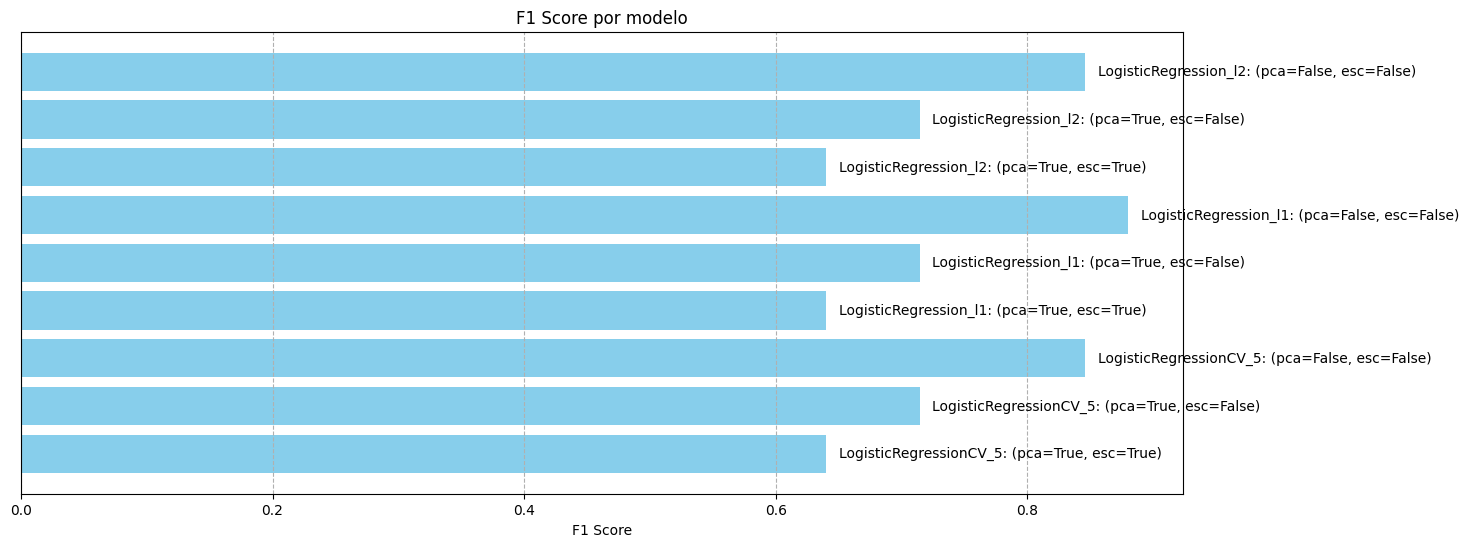

In [22]:
model_names = [f"{modelo}: (pca={pca}, esc={escalado})" for modelo, pca, escalado in zip(
    df_result['Modelo'], df_result['PCA'], df_result['Escalado'])]

f1_scores = df_result['F1 Score']

plt.figure(figsize=(15, 6))
plt.barh(df_result.index, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score por modelo')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.yticks([])

for i, modelo_name in enumerate(model_names):
    plt.text(f1_scores[i] + 0.01, i, modelo_name,
             va='center', fontsize=10, color='black')

plt.show()

In [23]:
max_f1_score_model = df_result.loc[df_result['F1 Score'].idxmax()]
print(max_f1_score_model)

Modelo       LogisticRegression_l1
Escalado                     False
PCA                          False
Accuracy                       0.9
Precision                 0.785714
Recall                         1.0
F1 Score                      0.88
Name: 3, dtype: object


# Resultados finales en conjunto de test

Se ellige como metrica el F1 Score

In [25]:
y_pred = model_lr_l1.predict(X_test)

m_accuracy = metrics.accuracy_score(y_pred, y_test)
m_precision = metrics.precision_score(y_pred, y_test)
m_recall = metrics.recall_score(y_pred, y_test)
m_f1 = metrics.f1_score(y_pred, y_test)

print("Métricas finales sobre el conjunto de test:")
print(f"Precisión (Precision): {m_precision:.2f}")
print(f"Recall: {m_recall:.2f}")
print(f"Puntuación F1 (F1 Score): {m_f1:.2f}")
print(f"Exactitud (Accuracy): {m_accuracy:.2f}")


Métricas finales sobre el conjunto de test:
Precisión (Precision): 0.71
Recall: 0.83
Puntuación F1 (F1 Score): 0.77
Exactitud (Accuracy): 0.80


# Conclusiones

Durante el entrenamiento de los distintos modelos, se utilizaron los datos de validación para realizar la comparación y selección de los mismos. El conjunto de test no se utilizó hasta el final, donde se obtuvieron las métricas reales y finales del modelo seleccionado. Esto se hace para no influenciar al entrenamiento del modelo con los datos de test en las distintas iteraciones en el ajuste de hiperparámetros y la selección del modelo. De esta forma, se asegura que las métricas finales obtenidas sean lo más precisas posibles. Se observa también que las métricas obtenidas sobre el conjunto de test son inferiores a las que se obtuvieron sobre el conjunto de validacion en la etapa de selección de modelo.

Para la selección del mejor modelo, se utilizó la metrica el F1 Score ya que combina tanto la precisión como el recall en una sola puntuación. En general, PCA (Principal Component Analysis) se utiliza para reducir la dimensionalidad de los datos, lo que puede ayudar a capturar la variación más importante y a eliminar el ruido. Sin embargo, en algunos casos, la reducción de dimensionalidad a través de PCA puede llevar a una pérdida de información valiosa, especialmente cuando la variación entre las características es importante para la clasificación. En este caso, podemos ver que los modelos sin PCA tienden a tener un F1 Score más alto que los modelos con PCA. Por lo tanto, mantener la dimensionalidad original resultó en un mejor modelo.

Por otro lado, los modelos que utilizan regularización L2 (Ridge) parecen funcionar mejor en términos de precisión (Precision) y F1 Score. La regularización de Ridge (L2) en modelos de regresión penaliza los coeficientes de las características para evitar que crezcan demasiado, lo que ayuda a prevenir el sobreajuste. Sin embargo, no realiza selección de características, por lo que todas las características contribuyen al modelo en cierta medida. En este sentido, se condice con los resultados obtenidos en PCA, donde la mejor metrica se obtuvo al no reducir dimensionalidad.